In [23]:
import pandas as  pd
from pathlib import Path
from graph.graph import ArticleGraph

In [24]:
df_tot = pd.read_csv('/Users/filippopacinelli/news-mapping-eu-elections/datasets/elezioni_europee_intermediate.csv')

In [25]:
df_tot = df_tot[df_tot.topics_person != {}]

In [26]:
df_tot = df_tot.dropna(subset='topics_person')

In [27]:
df_tot['topic'] = df_tot['topics_person'].apply(lambda x: eval(x)['topic'])
df_tot['person'] = df_tot['topics_person'].apply(lambda x: eval(x)['persons'])

In [28]:
df_tot = df_tot.reset_index(drop=True)

In [29]:
df_tot = df_tot.explode('person')

In [30]:
df_tot = df_tot.dropna(subset=['topic', 'person'])
df_tot = df_tot[(df_tot['topic'] != '') & (df_tot['person'] != '')]

In [31]:
df_tot = df_tot.reset_index(drop=True)

In [32]:
df_tot['newspaper'] = df_tot['source']

In [33]:
df_tot

,title,source,link,date,text,text_summary,topics_person,topic,person,newspaper
0,"Europee, sette i candidati ""impresentabili"" pe...",La Repubblica,https://www.repubblica.it/politica/2024/05/28/...,2024-05-28,"Europee, sette i candidati ""impresentabili"" pe...",The Italian Anti-Mafia Commission has released...,"{'topic': 'Criminalità e Sicurezza Pubblica', ...",Criminalità e Sicurezza Pubblica,Giuseppe Milazzo,La Repubblica
1,"Europee, sette i candidati ""impresentabili"" pe...",La Repubblica,https://www.repubblica.it/politica/2024/05/28/...,2024-05-28,"Europee, sette i candidati ""impresentabili"" pe...",The Italian Anti-Mafia Commission has released...,"{'topic': 'Criminalità e Sicurezza Pubblica', ...",Criminalità e Sicurezza Pubblica,Giorgia Meloni,La Repubblica
2,"Europee, sette i candidati ""impresentabili"" pe...",La Repubblica,https://www.repubblica.it/politica/2024/05/28/...,2024-05-28,"Europee, sette i candidati ""impresentabili"" pe...",The Italian Anti-Mafia Commission has released...,"{'topic': 'Criminalità e Sicurezza Pubblica', ...",Criminalità e Sicurezza Pubblica,D'Agostino,La Repubblica
3,"Europee, sette i candidati ""impresentabili"" pe...",La Repubblica,https://www.repubblica.it/politica/2024/05/28/...,2024-05-28,"Europee, sette i candidati ""impresentabili"" pe...",The Italian Anti-Mafia Commission has released...,"{'topic': 'Criminalità e Sicurezza Pubblica', ...",Criminalità e Sicurezza Pubblica,Falcone,La Repubblica
4,"Europee, sette i candidati ""impresentabili"" pe...",La Repubblica,https://www.repubblica.it/politica/2024/05/28/...,2024-05-28,"Europee, sette i candidati ""impresentabili"" pe...",The Italian Anti-Mafia Commission has released...,"{'topic': 'Criminalità e Sicurezza Pubblica', ...",Criminalità e Sicurezza Pubblica,Gambino,La Repubblica
...,...,...,...,...,...,...,...,...,...,...
798,"Elezioni, la Calabria pronta a “sbarcare” in E...",Avvenire,https://www.avveniredicalabria.it/calabria-ed-...,2024-06-06,"Calabria ed elezioni europee, ecco come ci vot...",The article discusses the upcoming European el...,"{'topic': 'Politiche Ambientali', 'persons': [...",Politiche Ambientali,Giorgia Meloni,Avvenire
799,"Elezioni, la Calabria pronta a “sbarcare” in E...",Avvenire,https://www.avveniredicalabria.it/calabria-ed-...,2024-06-06,"Calabria ed elezioni europee, ecco come ci vot...",The article discusses the upcoming European el...,"{'topic': 'Politiche Ambientali', 'persons': [...",Politiche Ambientali,Elly Schlein,Avvenire
800,"Confesercenti Incontra, gli incontri con i can...",Quotidiano Nazionale,https://www.confesercenti.it/blog/confesercent...,2024-05-24,"Confesercenti Incontra, gli incontri con i can...","Confesercenti, an Italian association, has org...","{'topic': 'Economia', 'persons': ['Patrizia De...",Economia,Patrizia De Luise,Quotidiano Nazionale
801,Il programma di Alternativa Popolare per le el...,Pagella Politica,https://pagellapolitica.it/articoli/programma-...,2024-05-17,Il programma di Alternativa Popolare per le el...,"Alternativa Popolare, a party led by Stefano B...","{'topic': 'Elezioni', 'persons': ['Stefano Ban...",Elezioni,Stefano Bandecchi,Pagella Politica


In [34]:
def map_incomplete_to_full(names):
    surname_to_fullname = {}
    
    # First pass: collect full names
    for name in names:
        parts = name.strip().split()
        if len(parts) >= 2:
            # Full name case (first and last name)
            surname = parts[-1]  # Last part is the surname
            surname_to_fullname[surname] = name  # Map surname to full name
    
    # Second pass: replace incomplete names with full names when possible
    mapped_names = []
    for name in names:
        parts = name.strip().split()
        if len(parts) == 1:
            # Only surname provided
            surname = parts[0]
            # Replace with full name if found
            full_name = surname_to_fullname.get(surname, name)
            mapped_names.append(full_name)
        else:
            # Full name already provided
            mapped_names.append(name)
    
    return mapped_names

In [35]:
df_tot['person'] = map_incomplete_to_full(df_tot['person'])

In [42]:
df_tot = df_tot[df_tot['topic'].str.contains('Europee') == False]
df_tot = df_tot[df_tot['topic'].str.contains('europee') == False]
df_tot = df_tot[df_tot['topic'].str.contains('Elezioni') == False]
df_tot = df_tot[df_tot['topic'].str.contains('elezioni') == False]
df_tot = df_tot[df_tot['topic'].str.contains('Elettorali') == False]
df_tot = df_tot[df_tot['topic'].str.contains('elettorali') == False]
df_tot = df_tot[df_tot['topic'].str.contains('Elettori') == False]
df_tot = df_tot[df_tot['topic'].str.contains('elettori') == False]

In [43]:
SOURCE_DIR = Path.cwd().parent
graph_config_path = SOURCE_DIR / "config/config_graph.json"

In [44]:
df_filter = df_tot[df_tot['newspaper'] == 'La Repubblica']

/Users/filippopacinelli/news-mapping-eu-elections/venv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


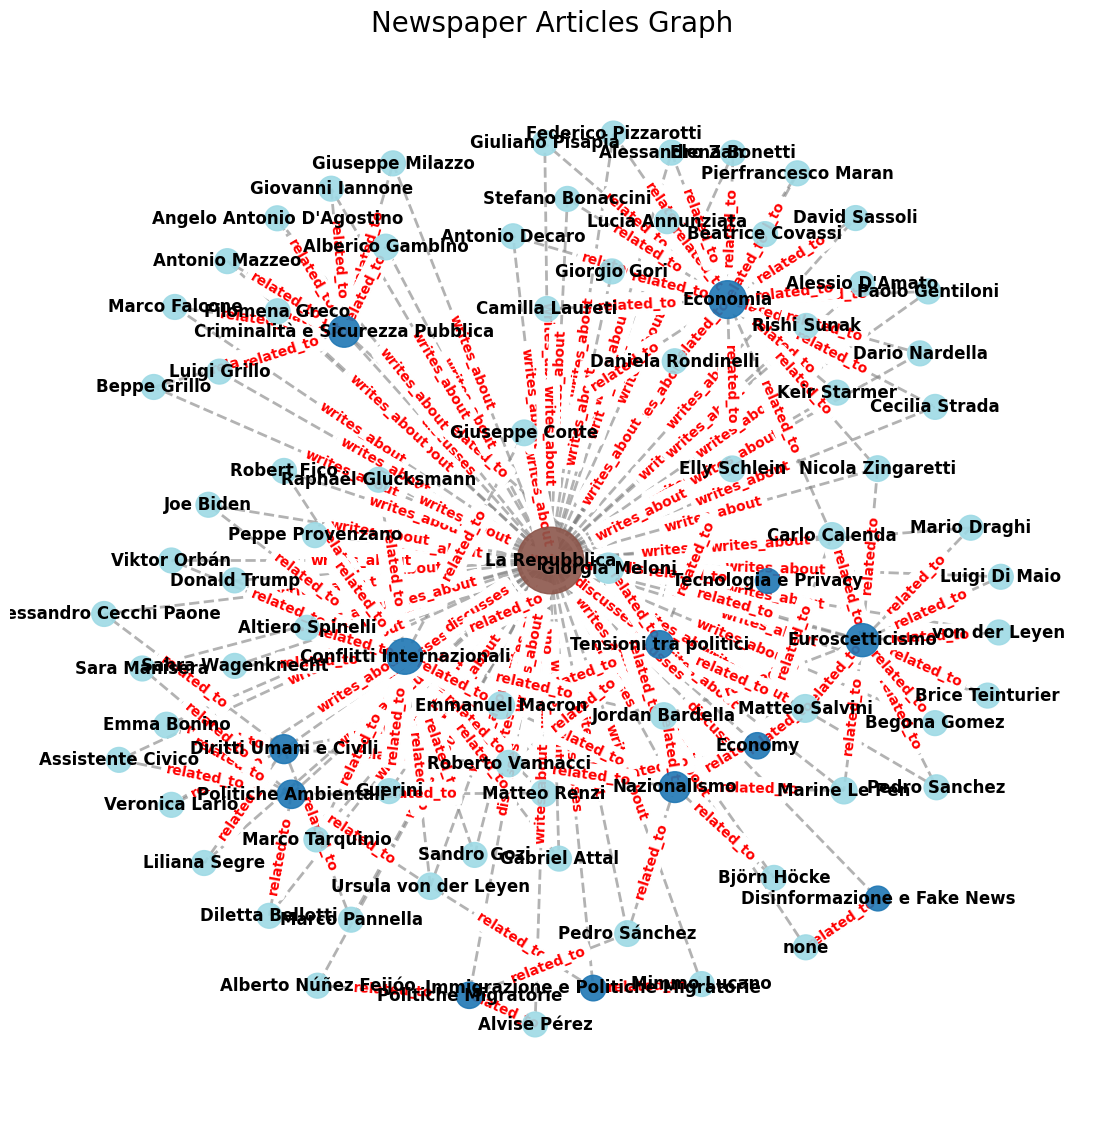

In [45]:
graph = ArticleGraph(df_filter, graph_config_path)
graph.plot_graph()


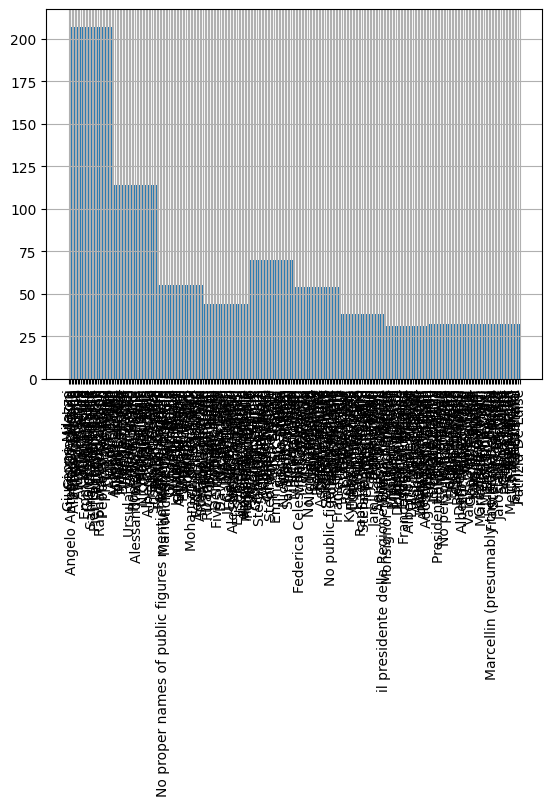

In [46]:
import matplotlib.pyplot as plt
df_tot.person.hist()
plt.xticks(rotation=90)

# Mostra il grafico
plt.show()

In [22]:
df_tot[df_tot.topic == 'Politiche']['text_summary'][37]

'The European elections are just around the corner, and politicians are trying to stand out with unusual campaign slogans and ads. Among them, Matteo Bandecchi, former leader of Brothers of Italy, and former Italian Prime Minister Giuseppe Conte and Matteo Renzi have all used humor in their campaign spots. However, not all of them have been successful, with some falling short of expectations. The article highlights some of the most unusual campaign slogans and ads from various political leaders and candidates.'